## KNN

In [175]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [150]:
data = {'Masa': [50, 80, 90, 45, 60],
        'Altura': [1.48, 1.82, 1.85, 1.55, 1.60],
        'Genero': ['m', 'h', 'h', 'm', 'm']}

In [151]:
data

{'Masa': [50, 80, 90, 45, 60],
 'Altura': [1.48, 1.82, 1.85, 1.55, 1.6],
 'Genero': ['m', 'h', 'h', 'm', 'm']}

In [152]:
punto_nuevo = {'Masa': [72],
               'Altura': [1.84]}

In [153]:
df = pd.DataFrame(data)
punto_nuevo = pd.DataFrame(punto_nuevo)

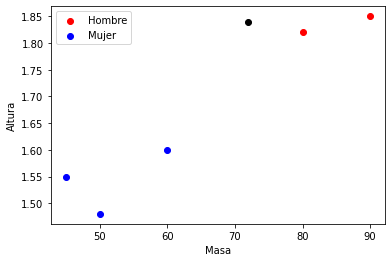

In [154]:
ax = plt.axes()

ax.scatter(df.loc[df['Genero'] == 'h', 'Masa'],
           df.loc[df['Genero'] == 'h', 'Altura'],
           c="red",
           label="Hombre")
ax.scatter(df.loc[df['Genero'] == 'm', 'Masa'],
           df.loc[df['Genero'] == 'm', 'Altura'],
           c="blue",
           label="Mujer")
ax.scatter(punto_nuevo['Masa'],
           punto_nuevo['Altura'],
           c="black")
plt.xlabel("Masa")
plt.ylabel("Altura")
ax.legend()
plt.show()

In [159]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
X = df[['Masa', 'Altura']]
y = df[['Genero']]

knn.fit(X, y)

e:\program files\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


KNeighborsClassifier(n_neighbors=4)

e:\program files\python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
e:\program files\python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
e:\program files\python37\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


([<matplotlib.axis.XTick at 0x198b15bb908>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

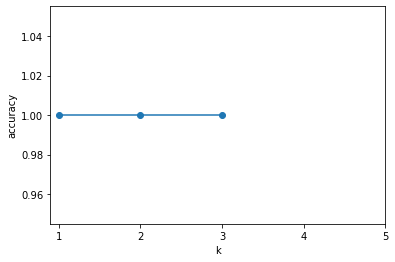

In [186]:
K = range(1, 4)
list_knn = []

for k in K:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X, y)
    list_knn.append(knn.score(X, y))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(K, list_knn)
plt.plot(K, list_knn)
plt.xticks([1,2,3,4,5])


In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, list_knn, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [160]:
prediccion = knn.predict(punto_nuevo)
print(prediccion)

['h']


# Random Forest Classifier

In [187]:
import requests, io, zipfile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [188]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'
resp = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(resp.content))
z.extractall("student_performance")

In [189]:
math_data = pd.read_csv("student_performance/student-mat.csv", sep=";")
port_data = pd.read_csv("student_performance/student-por.csv", sep=";")

In [190]:
math_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [198]:
students_data = pd.DataFrame()
students_data = students_data.append(math_data)
students_data = students_data.append(port_data)

In [199]:
students_data= students_data.drop_duplicates()

In [200]:
students_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1044.0,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
Medu,1044.0,2.603448,1.124907,0.0,2.0,3.0,4.0,4.0
Fedu,1044.0,2.387931,1.099938,0.0,1.0,2.0,3.0,4.0
traveltime,1044.0,1.522989,0.731727,1.0,1.0,1.0,2.0,4.0
studytime,1044.0,1.970307,0.834353,1.0,1.0,2.0,2.0,4.0
failures,1044.0,0.264368,0.656142,0.0,0.0,0.0,0.0,3.0
famrel,1044.0,3.935824,0.933401,1.0,4.0,4.0,5.0,5.0
freetime,1044.0,3.201149,1.031507,1.0,3.0,3.0,4.0,5.0
goout,1044.0,3.156130,1.152575,1.0,2.0,3.0,4.0,5.0
Dalc,1044.0,1.494253,0.911714,1.0,1.0,1.0,2.0,5.0


In [201]:
students_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [202]:
students_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [203]:
le = LabelEncoder()
for column_name in students_data.columns:
    if students_data[column_name].dtype == object:
        students_data[column_name] = le.fit_transform(students_data[column_name])
    else:
        pass

In [204]:
students_data.dtypes

school        int32
sex           int32
age           int64
address       int32
famsize       int32
Pstatus       int32
Medu          int64
Fedu          int64
Mjob          int32
Fjob          int32
reason        int32
guardian      int32
traveltime    int64
studytime     int64
failures      int64
schoolsup     int32
famsup        int32
paid          int32
activities    int32
nursery       int32
higher        int32
internet      int32
romantic      int32
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [205]:
X = students_data.drop(["higher"], axis=1)
y = students_data["higher"]

In [206]:
(X_train, X_test,y_train, y_test) = train_test_split(X,y,stratify=y,test_size=0.30,random_state=42)

In [207]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [208]:
y_test_pred = decision_tree.predict(X_test)

In [209]:
from sklearn.metrics import accuracy_score, recall_score

test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9044585987261147


In [210]:
recall_score(y_test, y_test_pred)

0.9477351916376306

In [211]:
confusion_matrix(y_test, y_test_pred)

array([[ 12,  15],
       [ 15, 272]], dtype=int64)

<AxesSubplot:>

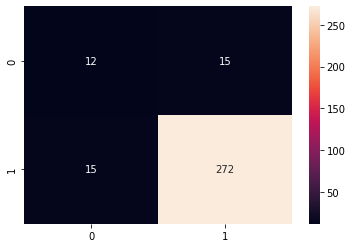

In [212]:
sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True, fmt='d')

In [235]:
random_forest_m = RandomForestClassifier(random_state=42, n_estimators=200,class_weight="balanced_subsample",max_features="log2")
random_forest_m.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_features='log2',
                       n_estimators=200, random_state=42)

In [233]:
y_test_pred = random_forest_m.predict(X_test)

In [236]:
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9203821656050956


In [ ]:
from sklearn.tree import export_graphviz, plot_tree

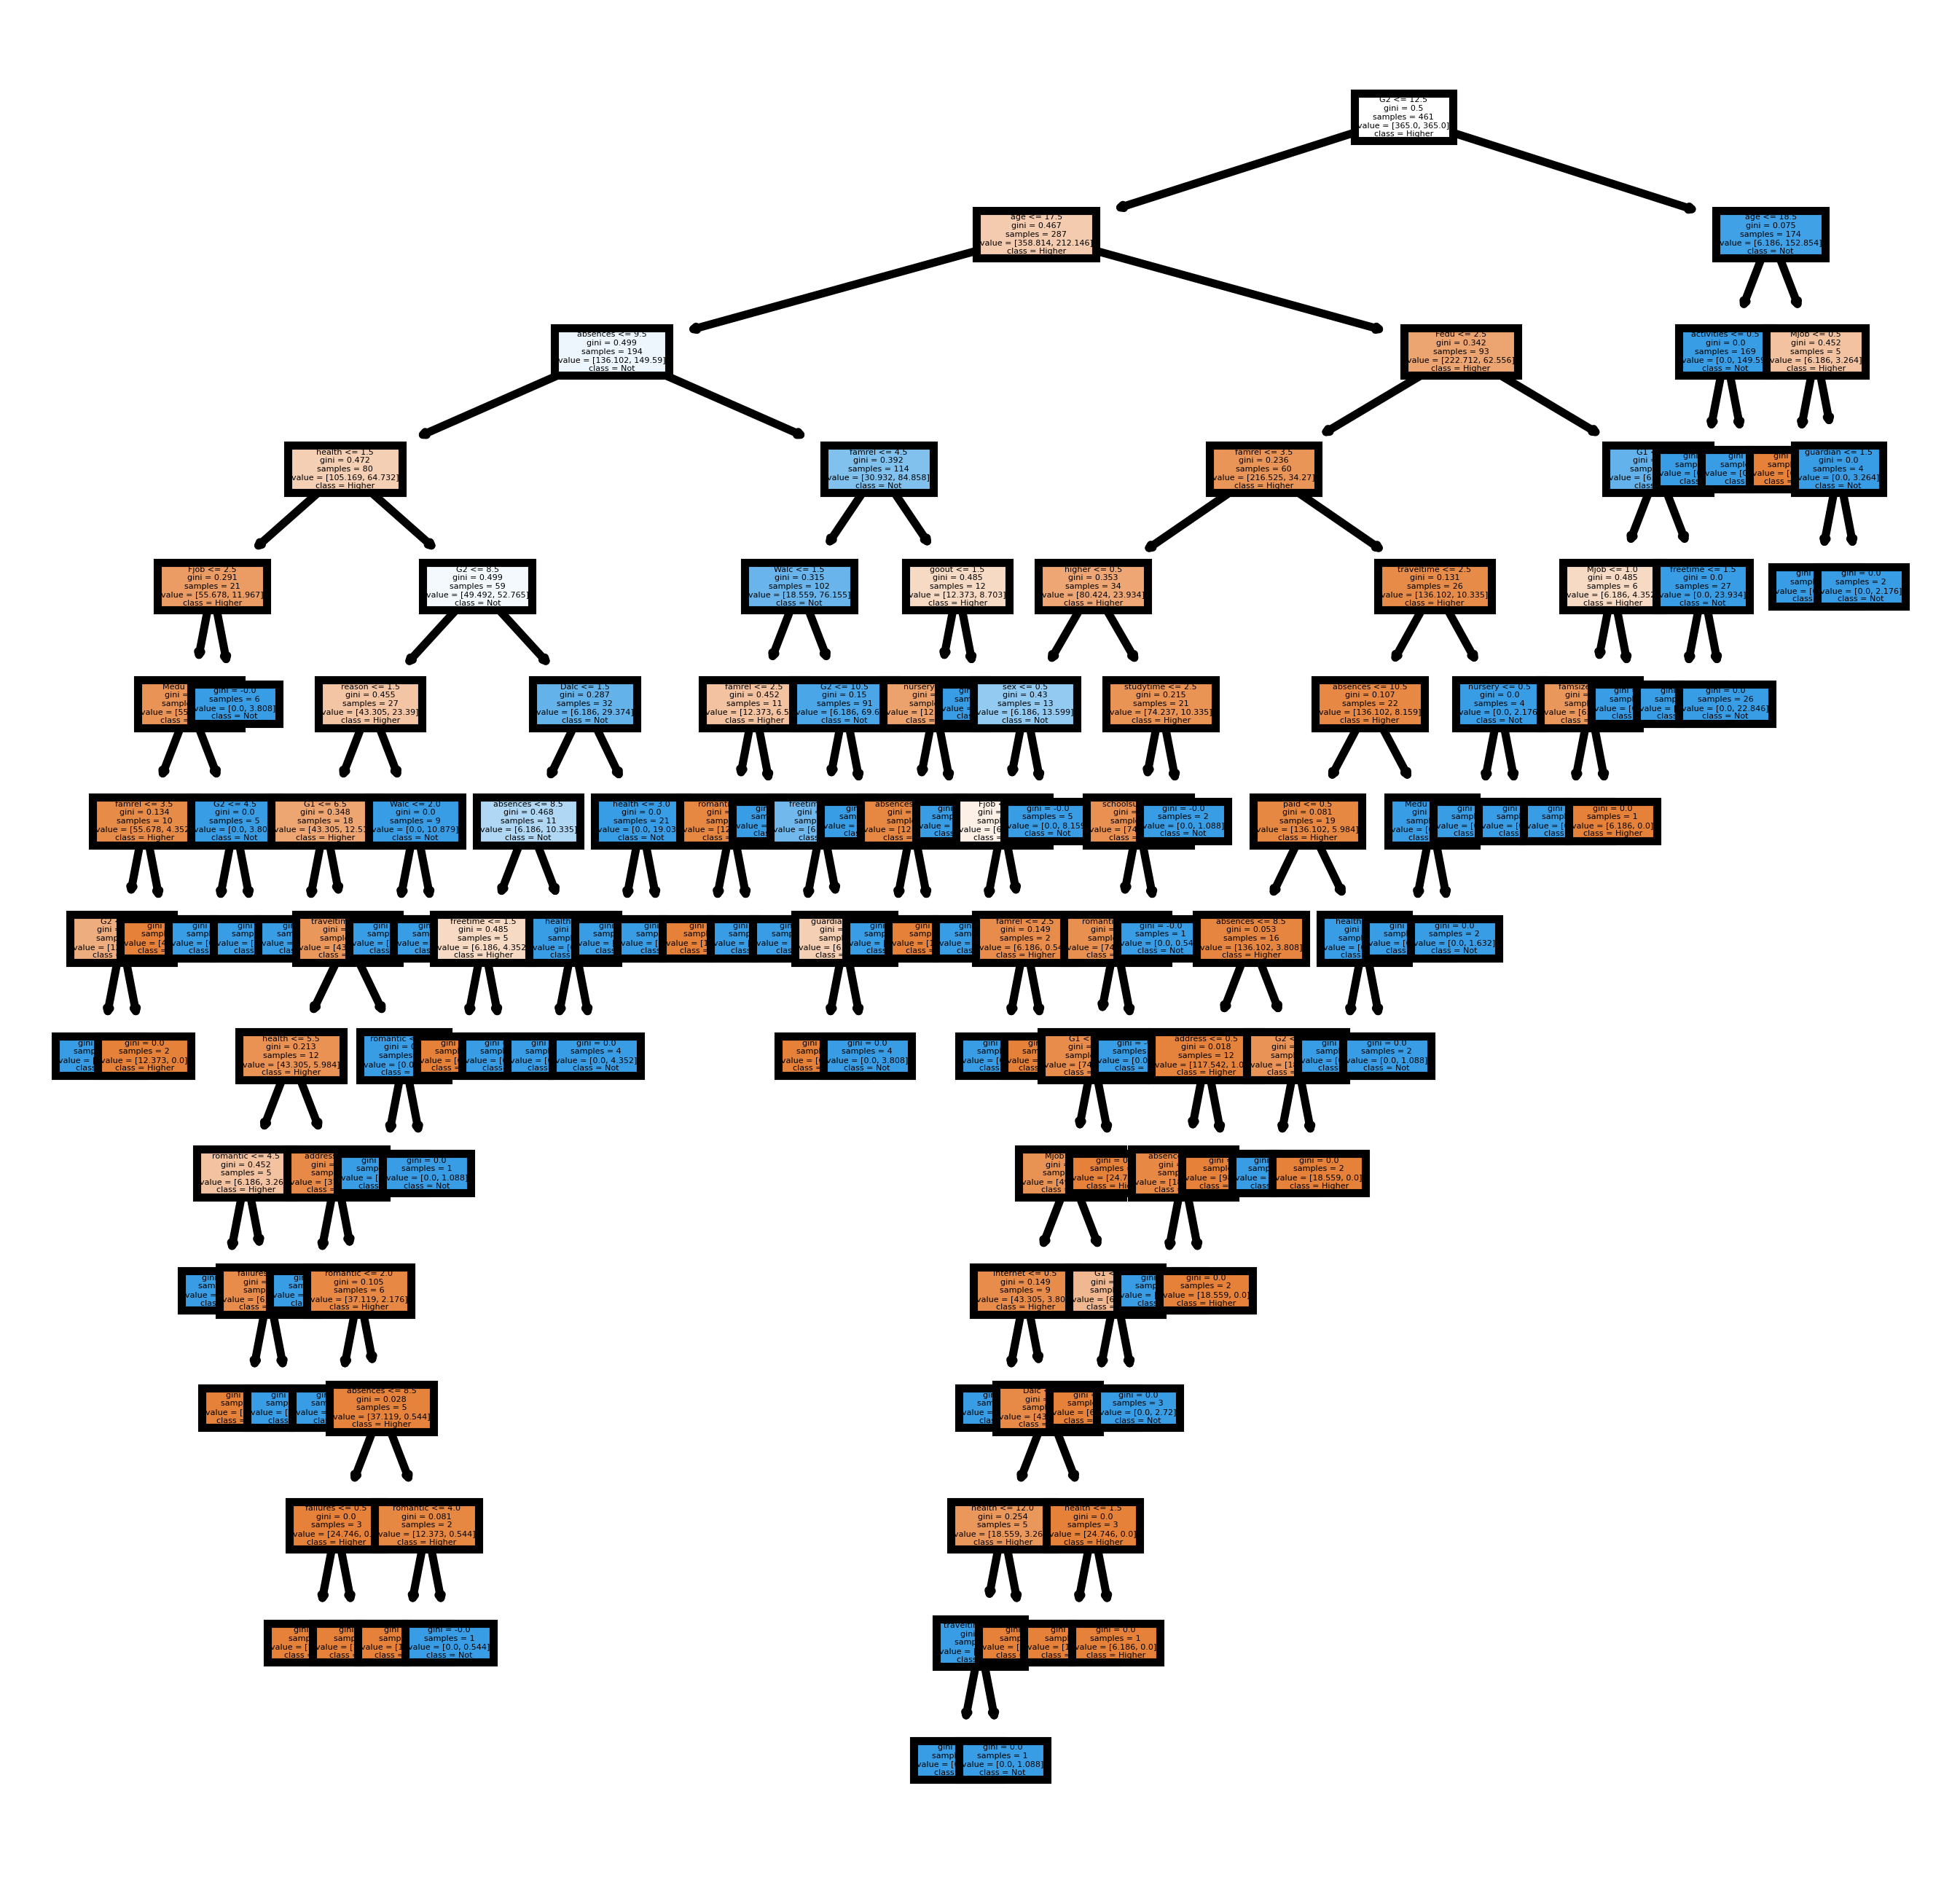

In [237]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(random_forest_m.estimators_[0],
               feature_names = students_data.columns, 
               class_names=["Higher", "Not"],
               filled = True);
fig.savefig('rf_individualtree.png')

<AxesSubplot:>

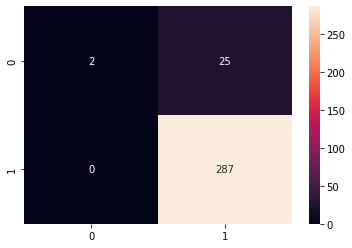

In [238]:
sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True, fmt='d')

## Logistic Regresion

In [161]:
import numpy as np

In [163]:
study_hs = np.array([0.5, 0.75, 1, 1.25, 1.5, 1.75, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 4.25, 4.5, 4.75, 5, 5.5]).reshape(-1,1)
pass_or_not = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [164]:
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression()

reg_log.fit(study_hs,pass_or_not)

LogisticRegression()

In [165]:
hs_test = np.array([0.5, 1, 3, 6]).reshape(-1,1)

In [166]:
pred = reg_log.predict(hs_test)
print(pred)

[0 0 1 1]


In [167]:
scores_reg = reg_log.predict_proba(hs_test)
print(scores_reg)

[[0.92858952 0.07141048]
 [0.87984046 0.12015954]
 [0.42402118 0.57597882]
 [0.02293029 0.97706971]]


In [168]:
print(scores_reg[:,1])

[0.07141048 0.12015954 0.57597882 0.97706971]
